# Install and Import modules then set the datafile

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import auth
#auth.authenticate_user()  # verify your account to read files which you have access to.
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default()) 

#spreadsheet = gc.open_by_key('1gYRwCWjtBJFAvKVoVF6x_XvZg1eeRXBBQtIpkkB9gG4') # Key to Speed Dating Data.csv
#sheet =  spreadsheet.get_worksheet(0)  # 0 means the first sheet in the file (We only have one sheet...)

dating = pd.read_csv('speeddating.csv', encoding="ISO-8859-1")
dating['expnum'].describe()

count    1800.000000
mean        5.570556
std         4.762569
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        20.000000
Name: expnum, dtype: float64

# Select only the attributes we will use

In [6]:
# Now that we know which features we want and which ones we do not. See Excel file.
listfeat = 'iid,gender,pid,match,partner,id,wave,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es'
# Converting it to an array
listfeat = listfeat.split(',')
# Using this array to select those features from the dataset
ds = dating[listfeat]

#Rename attractiveness given to other person to _o
# attr,sinc,intel,fun,amb,shar,like,prob
ds = ds.rename(
    columns={'attr': 'attr_o', 'sinc': 'sinc_o', 'intel': 'intel_o', 'amb': 'amb_o', 'shar': 'shar_o', 'like': 'like_o',
             'prob': 'prob_o'})

# Replace '' to NaN (not necessary if you run locally)
ds = ds.replace('', np.nan, regex=True)
ds.describe()

,iid,gender,pid,match,partner,id,wave,age,field_cd,race,...,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es
count,8378.000000,8378.000000,8368.000000,8378.000000,8378.000000,8377.000000,8378.000000,8283.000000,8296.000000,8315.000000,...,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,7205.000000
mean,283.675937,0.500597,283.863767,0.164717,8.963595,8.960248,11.350919,26.358928,7.662488,2.757186,...,8.294935,7.704460,8.403965,7.578388,6.941908,7.927232,8.284346,7.426213,7.617611,3.207814
std,158.583367,0.500029,158.584899,0.370947,5.491068,5.491329,5.995903,3.566763,3.758935,1.230905,...,1.407460,1.564321,1.076608,1.778315,1.498653,1.627054,1.283657,1.779129,1.773094,2.444813
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000
25%,154.000000,0.000000,154.000000,0.000000,4.000000,4.000000,7.000000,24.000000,5.000000,2.000000,...,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,2.000000
50%,281.000000,1.000000,281.000000,0.000000,8.000000,8.000000,11.000000,26.000000,8.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,3.000000
75%,407.000000,1.000000,408.000000,0.000000,13.000000,13.000000,15.000000,28.000000,10.000000,4.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,4.000000
max,552.000000,1.000000,552.000000,1.000000,22.000000,22.000000,21.000000,55.000000,18.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


# Fix all the rows with missing pid, id

# Dealing with outliers (Age)

In [7]:
#See whats wrong with current dataset
print(ds[['wave','partner','id','pid']].isnull().sum())
#Fix one missing id for iid 552 -> id = 22
ds.loc[ds.iid == 552, 'id'] = 22

#Get all rows with missing pid
no_pid = ds.pid.isnull()

# Fix the missing pid's
for i, row in ds[no_pid].iterrows():
    wave = row.wave
    partner = row.partner
    iid_of_partner = ds.loc[(ds.wave == wave) & (ds.id == partner)].iid.unique()[0]
    ds.loc[i, 'pid'] = iid_of_partner

# Juicy to see the 0 :P
print('After fixes are applied')
print(ds[['wave','partner','id','pid']].isnull().sum())




wave        0
partner     0
id          1
pid        10
dtype: int64
After fixes are applied
wave       0
partner    0
id         0
pid        0
dtype: int64


# Deal with missing values (remove attributes)

Index(['expnum', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1',
       'match_es'],
      dtype='object')


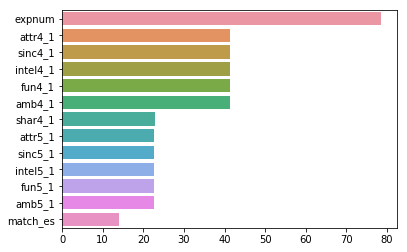

In [8]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
mean_missing = ds.isnull().mean().sort_values(ascending=False)

missing = ds.columns[ds.isnull().mean() > 0.1]
print(missing)

sns.barplot(x=mean_missing[:len(missing)]*100, y=missing)


In [9]:
#What are we dealing with? This function displays the mean missing values per column sorted descending (most missing values first)
mean_missing = ds.isnull().mean().sort_values(ascending=False)
print(mean_missing)



#Select the columns with more than 40% missing values (you will see from previous result that these are expnum and the 5_1 values. 
# (We could chose later to remove the 4_1 values as well as they show to have ~ 20% missing values)
missing = ds.columns[ds.isnull().mean() > 0.4]

#We could instead just not import these columns in the code block above...
ds = ds.drop(missing, axis=1)

len([x for x in ds.match if x == 1])

expnum      0.785152
fun5_1      0.414419
intel5_1    0.414419
sinc5_1     0.414419
attr5_1     0.414419
amb5_1      0.414419
shar4_1     0.228097
intel4_1    0.225471
attr4_1     0.225471
sinc4_1     0.225471
fun4_1      0.225471
amb4_1      0.225471
match_es    0.140010
career_c    0.016472
shar1_1     0.014443
attr3_1     0.012533
intel3_1    0.012533
fun3_1      0.012533
sinc3_1     0.012533
amb3_1      0.012533
exphappy    0.012055
amb1_1      0.011817
date        0.011578
age         0.011339
shar2_1     0.010623
amb2_1      0.010623
fun1_1      0.010623
field_cd    0.009788
dining      0.009429
tvsports    0.009429
              ...   
sports      0.009429
go_out      0.009429
gaming      0.009429
imprelig    0.009429
imprace     0.009429
hiking      0.009429
shopping    0.009429
clubbing    0.009429
attr1_1     0.009429
fun2_1      0.009429
intel2_1    0.009429
sinc2_1     0.009429
reading     0.009429
intel1_1    0.009429
sinc1_1     0.009429
attr2_1     0.009429
yoga        0

1380

### Printing outliers

C:\Python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


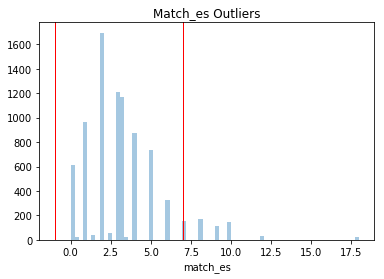

In [10]:
from sklearn.preprocessing import Imputer
ds2 = ds.copy()
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp.fit(ds2)
ds2 = pd.DataFrame(data = imp.transform(ds2), columns = ds2.columns)

fig = plt.figure() # create the top-level container
sns.distplot(ds2['match_es'], bins = 70, kde = False)
Q1 = ds['match_es'].quantile(0.25)
Q3 = ds['match_es'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(x=Q1 - 1.5 * IQR, linewidth=1, color='r')
plt.axvline(x=Q3 + 1.5 * IQR, linewidth=1, color='r')
plt.title('Match_es Outliers')
plt.show()
ds = ds2.copy()

In [11]:
dsIQR = ds.copy()
# detecting and dropping outliers in our data, for the feature age
Q1 = dsIQR['age'].quantile(0.25)
Q3 = dsIQR['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ds = dsIQR.query('(@Q1 - 1.5 * @IQR) <= age <= (@Q3 + 1.5 * @IQR)')

Q1 = dsIQR['match_es'].quantile(0.25)
Q3 = dsIQR['match_es'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
dsIQR = dsIQR.query('(@Q1 - 1.5 * @IQR) <= match_es <= (@Q3 + 1.5 * @IQR)')

ds = dsIQR.copy()

# Standardize the character trait attributes 0 - 100 point distribution (NOT USED)



In [12]:
ds2 = ds.copy()

# Select attributes per assessment
traits = ds2.filter(regex='attr', axis=1)
assesments = [name.replace('attr', '') for name in list(traits)]

#All attributes concerning assessments of character traits combined...
combined = [list(ds2.filter(regex=assesment, axis=1)) for assesment in assesments]
print(combined)
count = []
for traits in combined:
    # Drop every row where at least one value is missing (per assessment type)  
    #ds2.dropna(axis=0, subset=traits, how='any', inplace=True)
    # Create total for this assessment type
    total = ds2[traits].replace(np.nan, 0).apply(sum, axis=1)
    #Iterate over rows to correct NaNs where 100 points have already been distributed
    ds2.loc[total == 100, traits] = ds2.loc[total == 100, traits].replace(np.nan, 0)#Idk why, but inplace=True doesn't work here...
    print(ds2[traits].isnull().sum())
    #Standardize values
    #for trait in traits:
        # Create new value for this trait using created total
        #ds2[trait] = ds2[trait] * 100 / total
#Values left after removing every row that has a missing value in any of the character traits asessments...
len(ds2.index)
print(count)
print(ds2.loc[1442, ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']])

#Change original dataset back to new one
ds = ds2.copy()

[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'], ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'], ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'], ['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']]


attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
dtype: int64


attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
amb4_1      0
shar4_1     0
dtype: int64


attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
dtype: int64


attr3_1     0
sinc3_1     0
fun3_1      0
intel3_1    0
amb3_1      0
dtype: int64
[]
attr1_1     20.0
sinc1_1     25.0
intel1_1    25.0
fun1_1      15.0
amb1_1       5.0
shar1_1     10.0
Name: 1442, dtype: float64


## Correlation plots

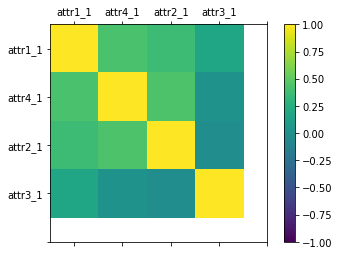

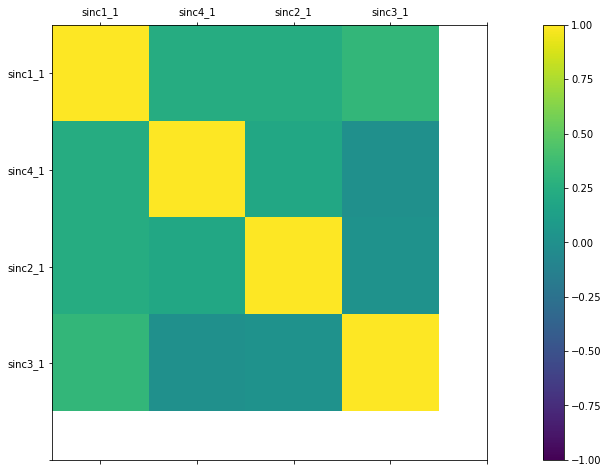

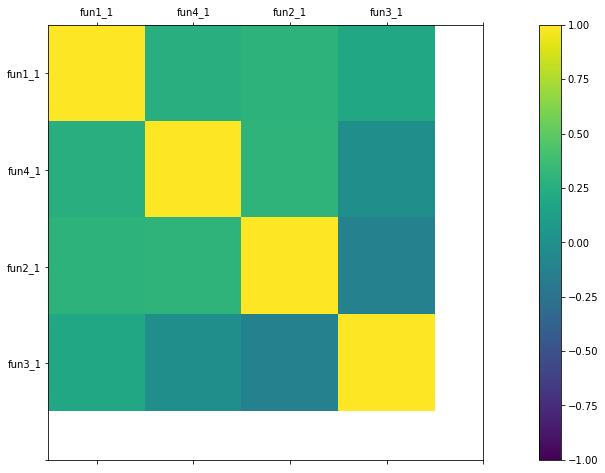

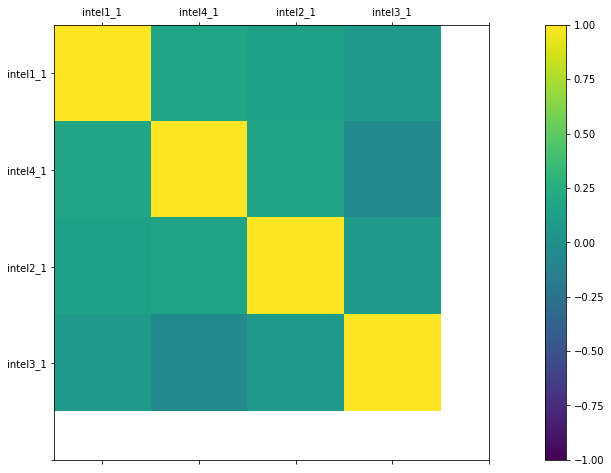

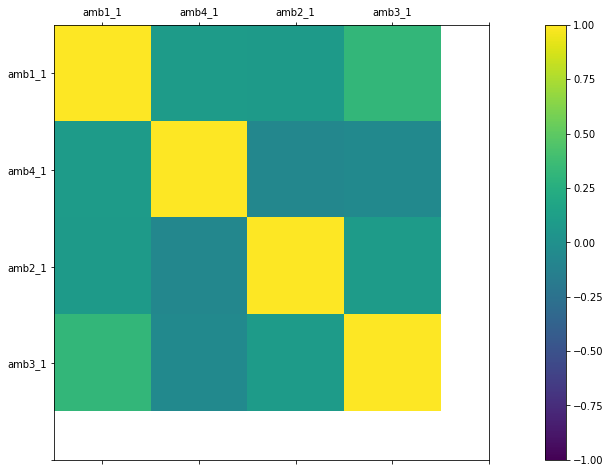

In [13]:
traits = ['attr', 'sinc', 'fun', 'intel', 'amb']

# Correlate traits against each other.
for f in [list(ds.filter(regex=trait, axis=1)) for trait in traits]:
    correlations = ds[f].corr()
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.rcParams['figure.figsize'] = (20, 8)
    ticks = np.arange(0, 5, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(f)
    ax.set_yticklabels(f)
    plt.show()

In [11]:
# Correlate assessments against each other.
for assesment in combined:
    correlations = ds[assesment].corr()
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.rcParams['figure.figsize'] = (20,8)
    ticks = np.arange(0,5,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(assesment)
    ax.set_yticklabels(assesment)
    plt.show()

NameError: ignored

# Separate the database in female/male

In [14]:
# We will create two different dataframes, Males and Females
dating_males = ds.loc[ds['gender'] == 1]
# Adding _M to all the columns to identify Male features
dating_males.columns = dating_males.columns + '_M'

dating_females = ds.loc[ds['gender'] == 0]
# Adding _F to all the columns to identify Female features
dating_females.columns = dating_females.columns + '_F'

# Now we will merge the two dataframes, setting the keys in pid_M and iid_F
ds_merged = dating_males.merge(dating_females, left_on='iid_M', right_on='pid_F', how='outer')
# Here we take only the rows containing equal iid_M and pid_F
ds_merged = ds_merged[ds_merged['pid_M'] == ds_merged['iid_F']]
pd.set_option('display.max_columns', 140)

# Now we have 158 columns and we no longer need a few attributes such as iid_M, gender_M ...
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
# Here we can see how irrelevant they are now:
ds_merged.head(10)

# Let's drop them
ds_merged.__delitem__('iid_M')
ds_merged.__delitem__('gender_M')
ds_merged.__delitem__('pid_M')
ds_merged.__delitem__('match_M')
ds_merged.__delitem__('iid_F')
ds_merged.__delitem__('gender_F')
ds_merged.__delitem__('pid_F')
ds_merged.__delitem__('wave_M')

# The match_F is the match in general, let's rename it
ds_merged = ds_merged.rename(columns={'match_F': 'match', 'wave_F': 'wave'})

#Reseting index
ds_merged = ds_merged.reset_index()
ds_merged.__delitem__('index')
ds_merged.index.name = 'index'
ds_merged.describe()

,partner_M,id_M,age_M,field_cd_M,race_M,imprace_M,imprelig_M,goal_M,date_M,go_out_M,career_c_M,sports_M,tvsports_M,exercise_M,dining_M,museums_M,art_M,hiking_M,gaming_M,clubbing_M,reading_M,tv_M,theater_M,movies_M,concerts_M,music_M,shopping_M,yoga_M,exphappy_M,attr1_1_M,sinc1_1_M,intel1_1_M,fun1_1_M,amb1_1_M,shar1_1_M,attr4_1_M,sinc4_1_M,intel4_1_M,fun4_1_M,amb4_1_M,shar4_1_M,attr2_1_M,sinc2_1_M,intel2_1_M,fun2_1_M,amb2_1_M,shar2_1_M,attr3_1_M,sinc3_1_M,fun3_1_M,intel3_1_M,amb3_1_M,match_es_M,match,partner_F,id_F,wave,age_F,field_cd_F,race_F,imprace_F,imprelig_F,goal_F,date_F,go_out_F,career_c_F,sports_F,tvsports_F,exercise_F,dining_F,museums_F,art_F,hiking_F,gaming_F,clubbing_F,reading_F,tv_F,theater_F,movies_F,concerts_F,music_F,shopping_F,yoga_F,exphappy_F,attr1_1_F,sinc1_1_F,intel1_1_F,fun1_1_F,amb1_1_F,shar1_1_F,attr4_1_F,sinc4_1_F,intel4_1_F,fun4_1_F,amb4_1_F,shar4_1_F,attr2_1_F,sinc2_1_F,intel2_1_F,fun2_1_F,amb2_1_F,shar2_1_F,attr3_1_F,sinc3_1_F,fun3_1_F,intel3_1_F,amb3_1_F,match_es_F
count,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,9.066882,8.948490,26.654814,7.366552,2.759747,3.492367,3.100602,2.176494,4.873850,2.164553,5.264713,6.999597,4.953751,6.002135,7.392577,6.562491,6.214480,5.544968,4.410632,5.574951,7.451880,4.900508,6.071338,7.654906,6.545175,7.677999,4.682477,3.655012,5.855632,26.463399,16.557408,19.527646,18.017127,8.653533,11.065376,27.468787,10.699586,12.070792,15.888381,7.988747,10.769544,24.963777,15.092474,16.359608,18.222503,14.223737,11.106344,6.872698,8.136279,7.509616,8.486553,7.469052,2.952433,0.157497,8.948490,9.066882,11.250809,26.208903,8.029527,2.764174,4.112388,4.141085,2.088446,5.141959,2.116778,5.237849,5.780269,4.146657,6.446605,8.146893,7.397031,7.178999,5.939324,3.343104,5.861521,7.905792,5.705592,7.420237,8.143587,7.041005,7.968584,6.460891,4.978515,5.125169,18.102981,18.259084,21.096788,17.083148,12.763664,12.734089,24.838308,11.233085,12.773842,14.910684,11.463488,10.835979,35.561493,11.293142,12.581969,18.872815,9.287553,12.546981,7.192694,8.481707,7.848109,8.344999,7.612350,2.681079
std,5.571843,5.466902,3.431777,3.544030,1.228774,2.647301,2.589585,1.449891,1.440015,1.161506,3.146461,2.433170,2.889134,2.363295,1.843984,2.073783,2.320237,2.570801,2.677426,2.560010,1.993113,2.487202,2.109376,1.786149,2.272776,1.906995,2.535325,2.579462,1.633301,13.526952,7.035835,6.683649,6.393369,6.098135,6.696643,15.475646,6.035183,6.372603,6.841483,5.112657,5.420845,12.859272,7.129395,6.774108,6.501863,7.337964,5.975451,1.408399,1.404373,1.677649,1.097106,1.943699,1.514396,0.364318,5.466902,5.571843,6.007026,3.686980,3.884829,1.224725,2.967534,2.868304,1.374637,1.439292,1.016569,3.444136,2.639999,2.602323,2.439661,1.582005,1.911906,2.052050,2.532885,2.471404,2.42

# Encode the data for categorical and binary attributes

In [15]:
ds_merged = pd.get_dummies(ds_merged)

# Dividing the dataset in two depending on the rating scales (1-10) vs (100 point distribution)

In [16]:
waves = (6,7,8,9)
ds10_merged = ds_merged.loc[ds_merged['wave'].isin(waves)]

ds_merged = ds_merged.loc[~ds_merged['wave'].isin(waves)]
ds_merged.wave.unique()

array([ 1.,  2.,  3.,  4.,  5., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21.])

# Change missing values with SKlearn Mean

In [17]:
from sklearn.impute import SimpleImputer
ds_missing_mean = ds_merged.copy()
ds_missing_median = ds_merged.copy()
ds_missing_most_frequent = ds_merged.copy()

ds10_missing_mean = ds10_merged.copy()
ds10_missing_median = ds10_merged.copy()
ds10_missing_most_frequent = ds10_merged.copy()

imp1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp1.fit(ds_missing_mean)
ds_missing_mean = pd.DataFrame(data = imp1.transform(ds_missing_mean), columns = ds_missing_mean.columns)

imp2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp2.fit(ds10_missing_mean)
ds10_missing_mean = pd.DataFrame(data = imp2.transform(ds10_missing_mean), columns = ds10_missing_mean.columns)

imp3 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp3.fit(ds_missing_median)
ds_missing_median = pd.DataFrame(data = imp3.transform(ds_missing_median), columns = ds_missing_median.columns)

imp4 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp4.fit(ds10_missing_median)
ds10_missing_median = pd.DataFrame(data = imp4.transform(ds10_missing_median), columns = ds10_missing_median.columns)

imp5 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp5.fit(ds_missing_most_frequent)
ds_missing_most_frequent = pd.DataFrame(data = imp5.transform(ds_missing_most_frequent), columns = ds_missing_most_frequent.columns)

imp6 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp6.fit(ds10_missing_most_frequent)
ds10_missing_most_frequent = pd.DataFrame(data = imp6.transform(ds10_missing_most_frequent), columns = ds10_missing_most_frequent.columns)


ds_merged = ds_missing_most_frequent.copy()
ds10_merged = ds10_missing_most_frequent.copy()

# Dividing the dataset (Train and Test)

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

# Not using the feature match in X
X = ds_merged.loc[:, ds_merged.columns.difference(['match'])]
y = ds_merged.match

%matplotlib inline

#Splitting Test and Train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=20)

# Splitting Test and Train (Testing rating scale 1-10)
X_train_2 = ds10_merged.loc[:, ds_merged.columns.difference(['match'])]
y_train_2 = ds10_merged.match
X_test_2 = ds10_merged.loc[:, ds_merged.columns.difference(['match'])]
y_test_2 = ds10_merged.match

# Creating SMOTE settings

### Applying SMOTE to the training set (Over-sampling)

In [19]:
from imblearn.over_sampling import SMOTE

def applySMOTE(x_train, y_train, random_state, ratio, k_neighbors=5):
    sm = SMOTE(random_state=random_state, ratio=ratio, k_neighbors=k_neighbors)
    X_trained, Y_trained = sm.fit_sample(x_train, y_train)
    return X_trained, Y_trained


In [20]:
X_train_smote, y_train_smote = applySMOTE(X_train, y_train, 12, 0.7)

### Aplying ClusterCentroids (Under-sampling)

In [437]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

## Doing any algorithm with any classifier

In [30]:
from sklearn.metrics import (roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def auc_roc_compute(y_pred, y_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return roc_auc

def getResults(classifier, x_train, x_test, y_train, y_test):
    results = {}
    classifier.fit(x_train, y_train)
    y_predicted = classifier.predict(x_test)
    results['classifier'] = type(classifier).__name__
    results['auc'] = auc_roc_compute(y_predicted, y_test)
    results['precision'] = metrics.precision_score(y_predicted, y_test)
    results['recall'] = metrics.recall_score(y_predicted, y_test)
    results['f1'] = metrics.f1_score(y_predicted, y_test)
    results['accuracy'] = metrics.accuracy_score(y_predicted, y_test)
    return results

dt_randomForest = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18, random_state=42, criterion='entropy')
rf_randomForest = RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=64, n_estimators=18)
knn_randomForest = KNeighborsClassifier(n_neighbors=6)
ada_randomForest = AdaBoostClassifier(n_estimators=60, random_state=42)
nb_randomForest = GaussianNB()

print(getResults(dt_randomForest, X_train_smote, X_test, y_train_smote, y_test))
print(getResults(rf_randomForest, X_train_smote, X_test, y_train_smote, y_test))
print(getResults(knn_randomForest, X_train_smote, X_test, y_train_smote, y_test))
print(getResults(ada_randomForest, X_train_smote, X_test, y_train_smote, y_test))
print(getResults(nb_randomForest, X_train_smote, X_test, y_train_smote, y_test))



{'classifier': 'DecisionTreeClassifier', 'auc': 0.5654121863799283, 'precision': 0.3888888888888889, 'recall': 0.22580645161290322, 'f1': 0.2857142857142857, 'accuracy': 0.6846846846846847}


{'classifier': 'RandomForestClassifier', 'auc': 0.5795250896057348, 'precision': 0.2222222222222222, 'recall': 0.4050632911392405, 'f1': 0.2869955156950672, 'accuracy': 0.8209459459459459}


{'classifier': 'KNeighborsClassifier', 'auc': 0.563508064516129, 'precision': 0.3958333333333333, 'recall': 0.22178988326848248, 'f1': 0.28428927680798, 'accuracy': 0.6768018018018018}


{'classifier': 'AdaBoostClassifier', 'auc': 0.5791890681003584, 'precision': 0.2847222222222222, 'recall': 0.3037037037037037, 'f1': 0.2939068100358423, 'accuracy': 0.7781531531531531}
{'classifier': 'GaussianNB', 'auc': 0.568212365591398, 'precision': 0.4375, 'recall': 0.21951219512195122, 'f1': 0.2923433874709977, 'accuracy': 0.6565315315315315}


## Testing Hyper-parameters

In [24]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

scoring = {'AUC': 'roc_auc', 'Recall': 'recall'}
tuned_parameters = [{'classification__n_neighbors': (list(range(1,20)))}]
pipe = Pipeline([
    ('sampling', SMOTE(ratio=0.7, k_neighbors=7)),
    ('classification', KNeighborsClassifier())
])

gs_knn = GridSearchCV(pipe, tuned_parameters, cv=5, scoring=scoring, refit='AUC', n_jobs=-1)
gs_knn.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sampling', SMOTE(k_neighbors=7, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=0.7,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classification__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring={'AUC': 'roc_auc', 'Recall': 'recall'}, verbose=0)

## Plotting the GridSearchCV results

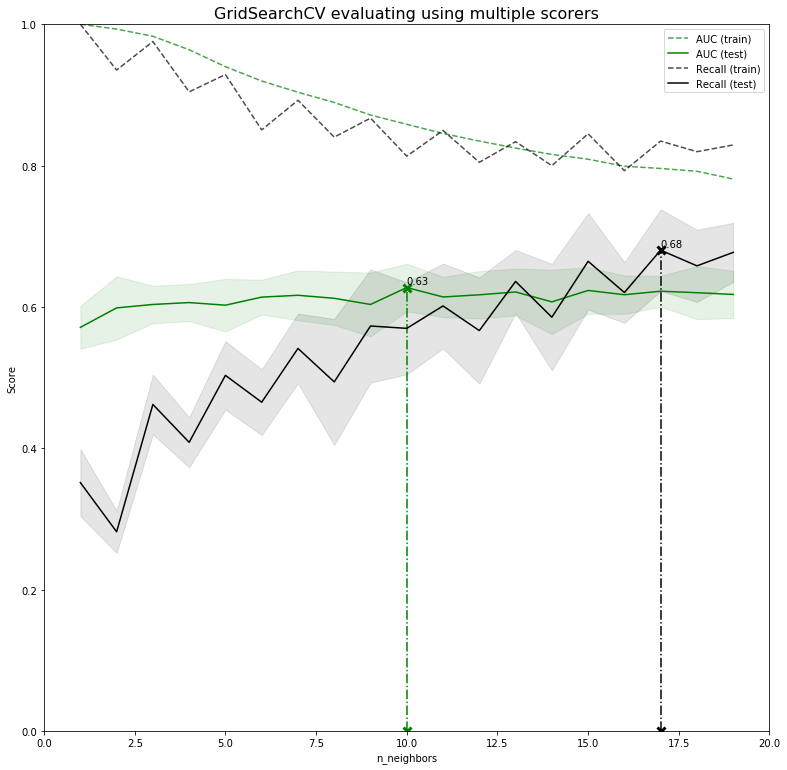

In [88]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers",
         fontsize=16)

scoring = {'AUC': 'roc_auc', 'Recall': 'recall'}
results = gs_knn.cv_results_
plt.xlabel("n_neighbors")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 20)
ax.set_ylim(0, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_classification__n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
   for sample, style in (('train', '--'), ('test', '-')):
       sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
       sample_score_std = results['std_%s_%s' % (sample, scorer)]
       ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                       sample_score_mean + sample_score_std,
                       alpha=0.1 if sample == 'test' else 0, color=color)
       ax.plot(X_axis, sample_score_mean, style, color=color,
               alpha=1 if sample == 'test' else 0.7,
               label="%s (%s)" % (scorer, sample))

   best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
   best_score = results['mean_test_%s' % scorer][best_index]

   # Plot a dotted vertical line at the best score for that scorer marked by x
   ax.plot([X_axis[best_index], ] * 2, [0, best_score],
           linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

   # Annotate the best score for that scorer
   ax.annotate("%0.2f" % best_score,
               (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()